## Flux distibution of residuals:

- Using `calfib`
- Removing continnum sources
- Removing bad fibers
- Removing bad pixels

In [1]:
import numpy as np
import json
import importlib

from het_cov import fibers
importlib.reload(fibers)


config_path = '/home/jovyan/work/hetdex/packs/hetdex_res/scripts/pca_calfib_norm.json'
with open(config_path, 'r') as f:
    config = json.load(f)

data_dir = '/home/jovyan/work/hetdex/data/'
fibs = fibers.Fibers(data_dir, 
                         config = config,
                         logging_level='INFO')

Fibers | 10/02/2025 06:01:59 PM | INFO  |  we have 6771 shotids in total
Fibers | 10/02/2025 06:01:59 PM | INFO  |  Masking options: {'bad_fibers': True, 'bad_pixels': True, 'strong_continuum': True, 'top_varying_pixels': False, 'top_percent': 5.0, 'top_fiber_frac': 0.3}
Fibers | 10/02/2025 06:01:59 PM | INFO  |  Covariance options: {'per': 'shot', 'method': 'pca', 'l': 100}
Fibers | 10/02/2025 06:01:59 PM | INFO  |  Flux, calfib_type: calfib


In [ ]:
fibs.get_flux_distribution()

Fibers | 10/02/2025 06:11:53 PM | INFO  |  working on shotid: 20240731009
Fibers | 10/02/2025 06:12:36 PM | INFO  |  Total fibers: 104160
Fibers | 10/02/2025 06:12:38 PM | INFO  |  Good fibers: 97197, Fraction of good pixels 0.9711028805368137
Fibers | 10/02/2025 06:12:46 PM | INFO  |   Remaining fraction after removing continuum sources 0.7058551189851539 
Fibers | 10/02/2025 06:12:52 PM | INFO  |  progress 0/6771
Fibers | 10/02/2025 06:12:52 PM | INFO  |  Saving flux distribution to /home/jovyan/work/hetdex/data/flux_dist.h5.
Fibers | 10/02/2025 06:12:52 PM | INFO  |  working on shotid: 20240731008
Fibers | 10/02/2025 06:13:44 PM | INFO  |  Total fibers: 104160
Fibers | 10/02/2025 06:13:46 PM | INFO  |  Good fibers: 94434, Fraction of good pixels 0.9709714218498131
Fibers | 10/02/2025 06:13:53 PM | INFO  |   Remaining fraction after removing continuum sources 0.8191435288137747 
Fibers | 10/02/2025 06:14:00 PM | INFO  |  working on shotid: 20240731007
Fibers | 10/02/2025 06:14:45 PM 

In [28]:
fdist, bins = fibs.get_flux_distribution_one_shot(fibs.shotids_list[-1000])

Fibers | 10/02/2025 06:06:26 PM | INFO  |  Total fibers: 60480
Fibers | 10/02/2025 06:06:27 PM | INFO  |  Good fibers: 58344, Fraction of good pixels 0.9687853879030349
Fibers | 10/02/2025 06:06:32 PM | INFO  |   Remaining fraction after removing continuum sources 0.7894385026737968 


In [29]:
fdist.shape

(1036, 999)

(0.0, 0.05)

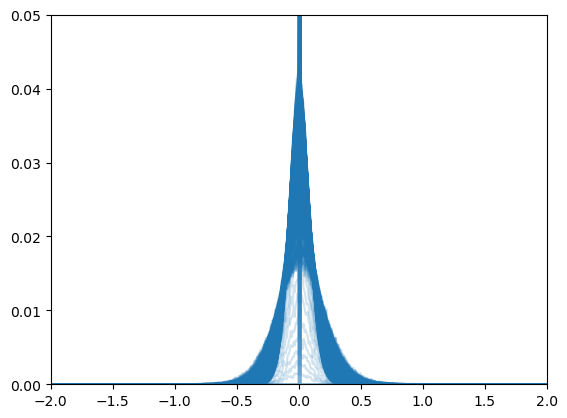

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
mbins = 0.5 * (bins[1:] + bins[:-1])
for i in range(100, fdist.shape[0]):
    ax.plot(mbins, fdist[i,:]/np.sum(fdist[i,:]), alpha=0.2, color='C0')
ax.set_xlim((-2,2))
ax.set_ylim((0,0.05))